In [25]:
# Simple Heart Failure Prediction Model
# Made for beginners - clean and easy to understand
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [26]:
# Step 1: Load the data
print("Loading data...")
df = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')

print(f"Data loaded! We have {len(df)} patients")
print(f"Features: {df.shape[1]} columns")


Loading data...
Data loaded! We have 299 patients
Features: 13 columns


In [27]:
# Step 2: Quick look at the data
print("\nFirst 5 patients:")
print(df.head())

print("\nTarget variable distribution:")
print(f"Survived: {len(df[df['DEATH_EVENT']==0])} patients")
print(f"Death: {len(df[df['DEATH_EVENT']==1])} patients")



First 5 patients:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6     

In [28]:
# Step 3: Check for missing data
print(f"\nMissing values: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() == 0:
    print("Great! No missing values found.")

# Step 4: Simple visualization
plt.figure(figsize=(12, 8))


Missing values: 0
Great! No missing values found.


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

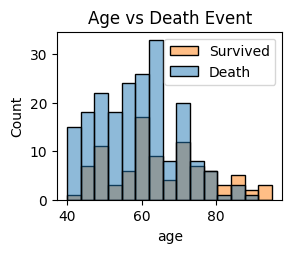

In [29]:
# Plot 1: Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=15)
plt.title('Age vs Death Event')
plt.legend(['Survived', 'Death'])

([<matplotlib.axis.XTick at 0x7cf4f5ce9810>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Death')])

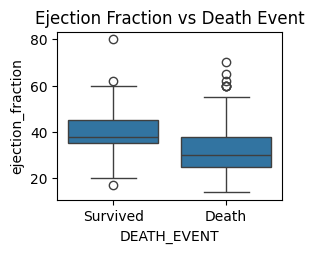

In [30]:
# Plot 2: Ejection fraction
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')
plt.title('Ejection Fraction vs Death Event')
plt.xticks([0, 1], ['Survived', 'Death'])

([<matplotlib.axis.XTick at 0x7cf4f59eeb10>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Death')])

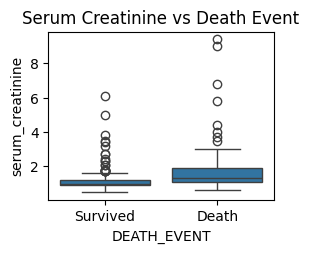

In [31]:
# Plot 3: Serum creatinine
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')
plt.title('Serum Creatinine vs Death Event')
plt.xticks([0, 1], ['Survived', 'Death'])

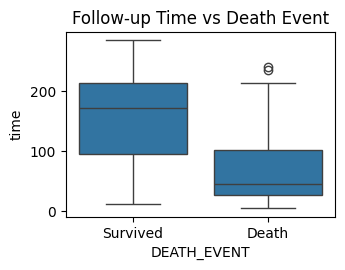

In [32]:
# Plot 4: Time
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='DEATH_EVENT', y='time')
plt.title('Follow-up Time vs Death Event')
plt.xticks([0, 1], ['Survived', 'Death'])

plt.tight_layout()
plt.show()

In [33]:
# Step 5: Prepare data for training
print("\nPreparing data for training...")

# Separate features and target
X = df.drop('DEATH_EVENT', axis=1)  # All columns except target
y = df['DEATH_EVENT']  # Target column

print(f"Features: {list(X.columns)}")
print(f"We have {len(X.columns)} features to predict death event")


Preparing data for training...
Features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
We have 12 features to predict death event


In [34]:
# Step 6: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")



Data split:
Training samples: 239
Testing samples: 60


In [35]:
# Step 7: Train the model
print("\nTraining the model...")

# Using Random Forest - it's powerful and beginner-friendly
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of trees
    random_state=42    # For reproducible results
)

# Train the model
model.fit(X_train, y_train)
print("Model training completed!")



Training the model...
Model training completed!


In [36]:
# Step 8: Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)


Making predictions...


In [37]:
# Step 9: Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"That's {accuracy*100:.2f}% accuracy!")


Model Accuracy: 0.8500
That's 85.00% accuracy!


In [38]:
# Step 10: Detailed results
print("\nDetailed Results:")
print(classification_report(y_test, y_pred, target_names=['Survived', 'Death']))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"True Survived, Predicted Survived: {cm[0,0]}")
print(f"True Survived, Predicted Death: {cm[0,1]}")
print(f"True Death, Predicted Survived: {cm[1,0]}")
print(f"True Death, Predicted Death: {cm[1,1]}")



Detailed Results:
              precision    recall  f1-score   support

    Survived       0.85      0.95      0.90        41
       Death       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60


Confusion Matrix:
True Survived, Predicted Survived: 39
True Survived, Predicted Death: 2
True Death, Predicted Survived: 7
True Death, Predicted Death: 12


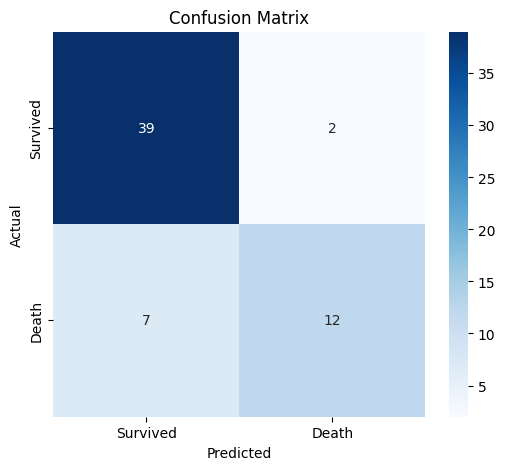


Most Important Features:
                     feature  importance
11                      time    0.360684
7           serum_creatinine    0.157425
4          ejection_fraction    0.128067
6                  platelets    0.076477
0                        age    0.076113
2   creatinine_phosphokinase    0.073615
8               serum_sodium    0.066102
3                   diabetes    0.014328
5        high_blood_pressure    0.012354
9                        sex    0.011655
10                   smoking    0.011601
1                    anaemia    0.011578


In [39]:

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Survived', 'Death'],
           yticklabels=['Survived', 'Death'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 12: Feature importance
print("\nMost Important Features:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)


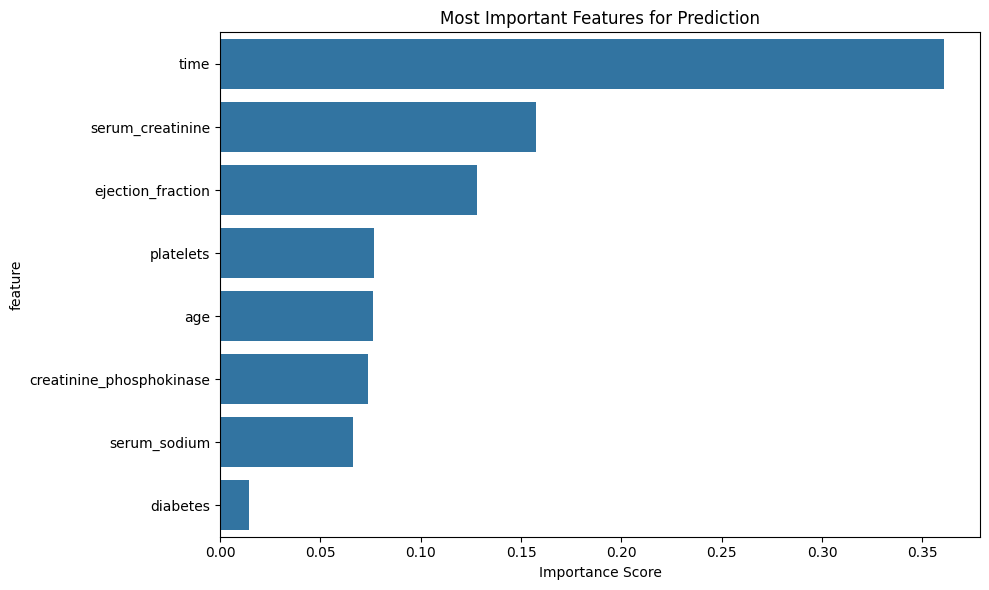


Saving the model...


In [40]:
# Visualize top features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(8)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Most Important Features for Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Step 13: Save the model
print("\nSaving the model...")
with open('heart_failure_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [41]:
# Also save feature names for later use
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

print("Model saved successfully!")

# Step 14: Test the saved model
print("\nTesting saved model...")
with open('heart_failure_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make sure it works
test_prediction = loaded_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f"Loaded model accuracy: {test_accuracy:.4f}")

if test_accuracy == accuracy:
    print("Perfect! Saved model works correctly.")
else:
    print("Warning: Something went wrong with saving/loading.")


Model saved successfully!

Testing saved model...
Loaded model accuracy: 0.8500
Perfect! Saved model works correctly.


In [42]:
# Step 15: Example prediction function
def predict_patient_risk(age, anaemia, creatinine_phosphokinase, diabetes,
                        ejection_fraction, high_blood_pressure, platelets,
                        serum_creatinine, serum_sodium, sex, smoking, time):
    """
    Function to predict risk for a new patient
    """
    # Create a dataframe with the input
    patient_data = pd.DataFrame({
        'age': [age],
        'anaemia': [anaemia],
        'creatinine_phosphokinase': [creatinine_phosphokinase],
        'diabetes': [diabetes],
        'ejection_fraction': [ejection_fraction],
        'high_blood_pressure': [high_blood_pressure],
        'platelets': [platelets],
        'serum_creatinine': [serum_creatinine],
        'serum_sodium': [serum_sodium],
        'sex': [sex],
        'smoking': [smoking],
        'time': [time]
    })

    # Make prediction
    prediction = loaded_model.predict(patient_data)[0]
    probability = loaded_model.predict_proba(patient_data)[0]

    if prediction == 0:
        result = "LOW RISK"
        confidence = probability[0] * 100
    else:
        result = "HIGH RISK"
        confidence = probability[1] * 100

    return f"Prediction: {result} (Confidence: {confidence:.1f}%)"